Name: Michael Son <br>
ID: 028758845

In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
import random
import keras

from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [14]:
filenames = os.listdir('train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(str(1))
    else:
        categories.append(str(0))

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df.head() ,  df.tail()

(       filename category
 0     cat.0.jpg        0
 1     cat.1.jpg        0
 2    cat.10.jpg        0
 3   cat.100.jpg        0
 4  cat.1000.jpg        0,
            filename category
 24995  dog.9995.jpg        1
 24996  dog.9996.jpg        1
 24997  dog.9997.jpg        1
 24998  dog.9998.jpg        1
 24999  dog.9999.jpg        1)

In [15]:
df['category'].value_counts()

category
0    12500
1    12500
Name: count, dtype: int64

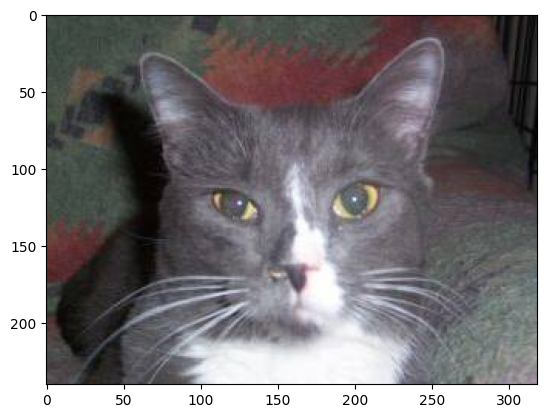

In [16]:
sample = random.choice(filenames)
image = load_img("train/" +sample)
plt.imshow(image)

In [22]:
train_data, valid_data = train_test_split(df, test_size = 0.2, random_state= 42)
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

In [23]:
train_data_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_data_gen.flow_from_dataframe(
    train_data,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 20000 validated image filenames belonging to 2 classes.


In [24]:
valid_data_gen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_data_gen.flow_from_dataframe(
    valid_data,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 5000 validated image filenames belonging to 2 classes.


In [25]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=(128,128,3)),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=2, activation='softmax')
])

In [27]:
#keras.utils.plot_model(model, 'model.png')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])

In [55]:
model.fit(train_generator, epochs=30, verbose=1, validation_data=valid_generator)

Epoch 1/30
1334/1334 [==============================] - 132s 99ms/step - loss: 0.5476 - accuracy: 0.7271 - val_loss: 0.4991 - val_accuracy: 0.7652
Epoch 2/30
1334/1334 [==============================] - 97s 73ms/step - loss: 0.5218 - accuracy: 0.7424 - val_loss: 0.4848 - val_accuracy: 0.7638
Epoch 3/30
1334/1334 [==============================] - 98s 73ms/step - loss: 0.5092 - accuracy: 0.7505 - val_loss: 0.4564 - val_accuracy: 0.7846
Epoch 4/30
1334/1334 [==============================] - 101s 76ms/step - loss: 0.4913 - accuracy: 0.7674 - val_loss: 0.4505 - val_accuracy: 0.7802
Epoch 5/30
1334/1334 [==============================] - 102s 76ms/step - loss: 0.4770 - accuracy: 0.7760 - val_loss: 0.4979 - val_accuracy: 0.7514
Epoch 6/30
1334/1334 [==============================] - 103s 77ms/step - loss: 0.4673 - accuracy: 0.7825 - val_loss: 0.4222 - val_accuracy: 0.8026
Epoch 7/30
1334/1334 [==============================] - 103s 78ms/step - loss: 0.4529 - accuracy: 0.7893 - val_loss: 0.4

In [56]:
model.save('cat_vs_dog_model.h5')

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
test_model = load_model('cat_vs_dog_model.h5')

dog_path = "test_data/dog/"
cat_path = "test_data/cat/"

dog_filenames = os.listdir(dog_path)
cat_filenames = os.listdir(cat_path)

test_filenames = [(dog_path + filename, 'dog') for filename in dog_filenames] + [(cat_path + filename, 'cat') for filename in cat_filenames]


1/1 [==============================] - 0s 16ms/step


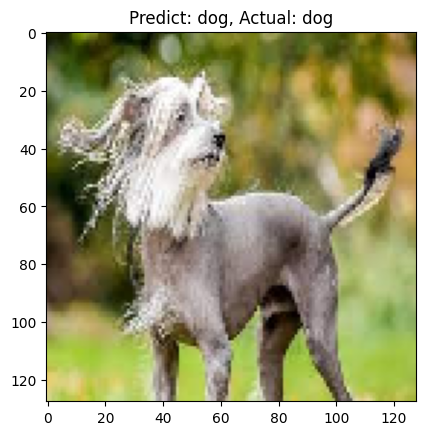

1/1 [==============================] - 0s 16ms/step


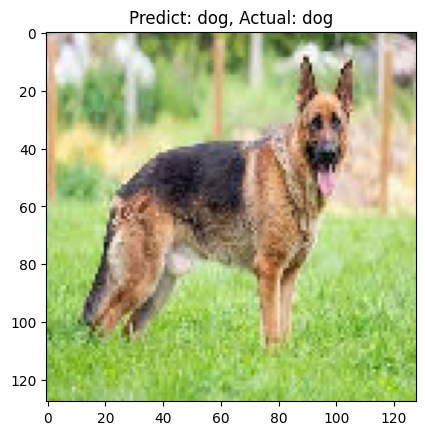

1/1 [==============================] - 0s 15ms/step


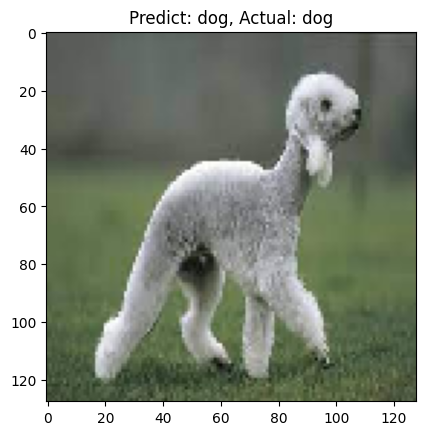

1/1 [==============================] - 0s 15ms/step


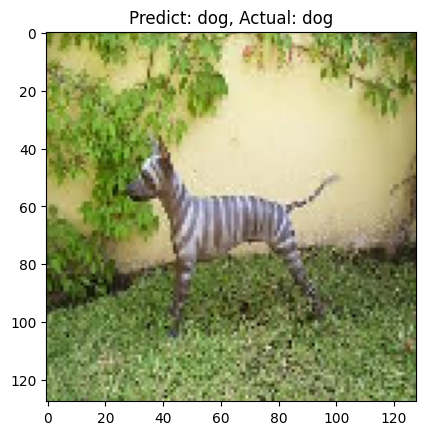

1/1 [==============================] - 0s 14ms/step


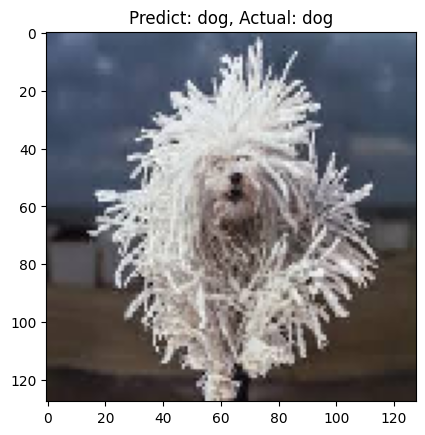

1/1 [==============================] - 0s 14ms/step


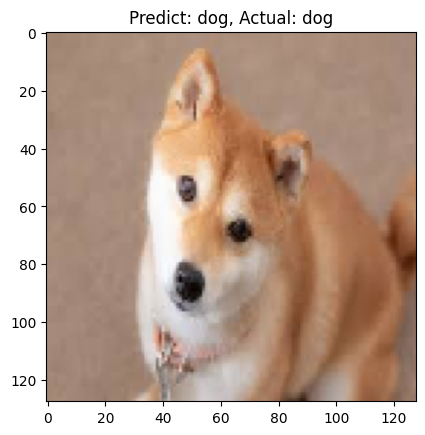

1/1 [==============================] - 0s 15ms/step


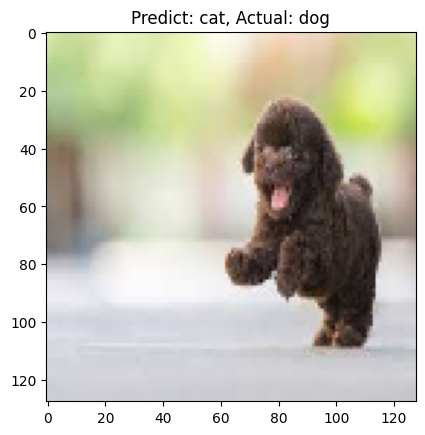

1/1 [==============================] - 0s 15ms/step


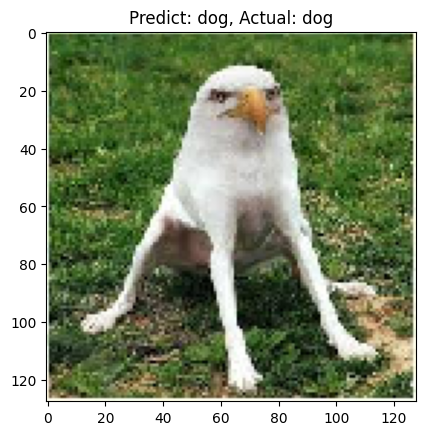

1/1 [==============================] - 0s 14ms/step


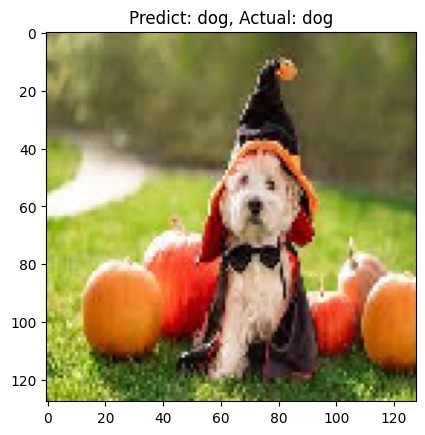

1/1 [==============================] - 0s 17ms/step


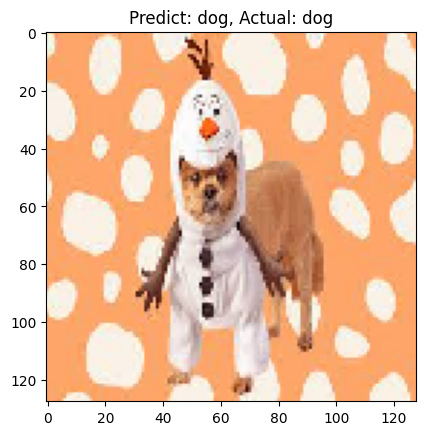

1/1 [==============================] - 0s 15ms/step


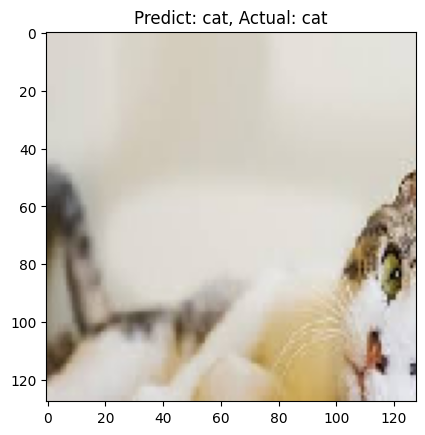

1/1 [==============================] - 0s 20ms/step


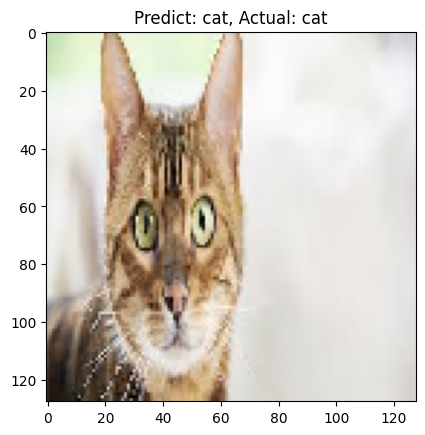

1/1 [==============================] - 0s 16ms/step


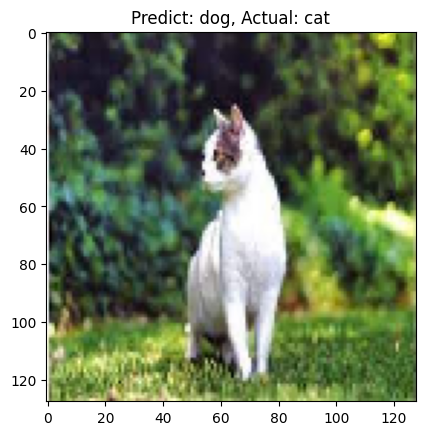

1/1 [==============================] - 0s 20ms/step


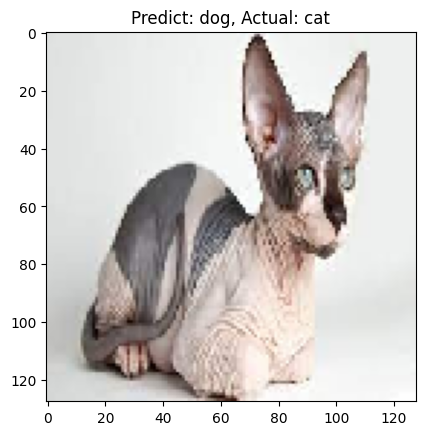

1/1 [==============================] - 0s 15ms/step


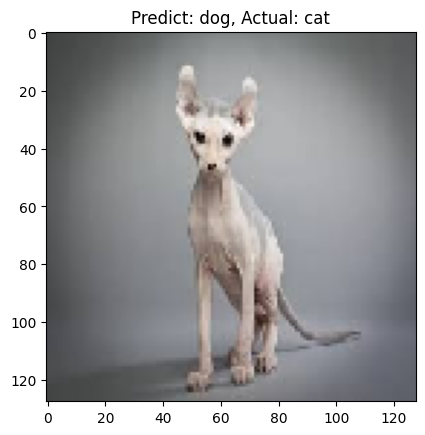

1/1 [==============================] - 0s 15ms/step


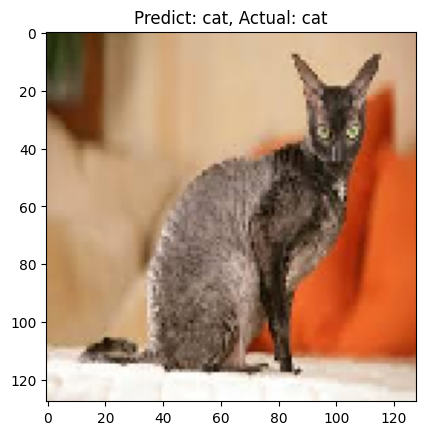

1/1 [==============================] - 0s 14ms/step


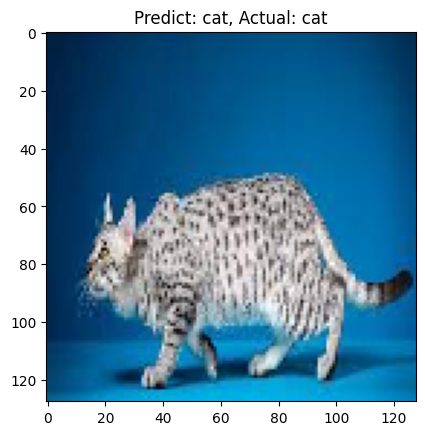

1/1 [==============================] - 0s 15ms/step


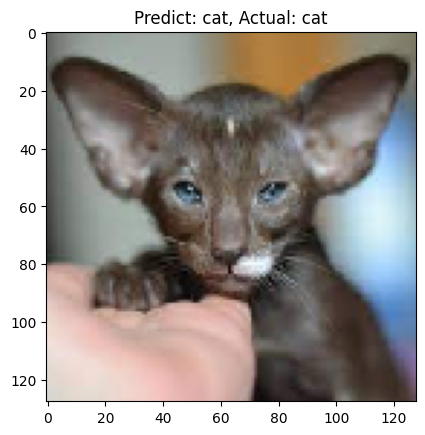

1/1 [==============================] - 0s 18ms/step


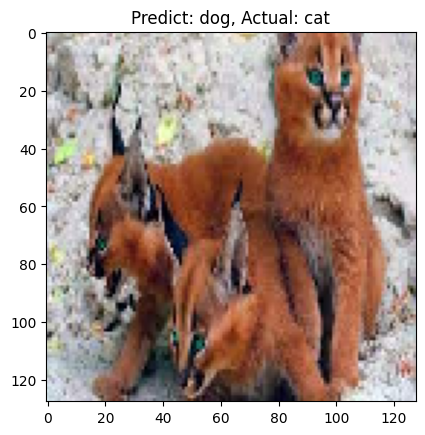

1/1 [==============================] - 0s 16ms/step


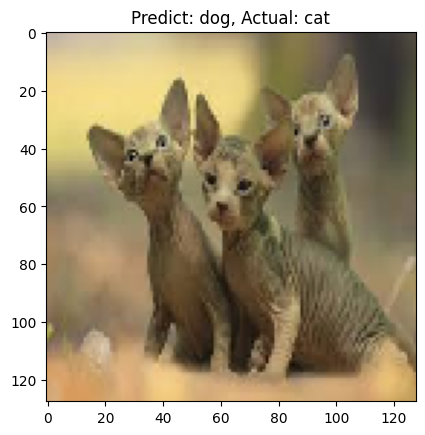

['dog1.jpeg', 'dog10.jpeg', 'dog2.jpeg', 'dog3.jpeg', 'dog4.jpeg', 'dog5.jpeg', 'dog6.jpeg', 'dog7.jpeg', 'dog8.jpeg', 'dog9.jpeg', 'cat1.jpeg', 'cat10.jpeg', 'cat2.jpeg', 'cat3.jpeg', 'cat4.jpeg', 'cat5.jpeg', 'cat6.jpeg', 'cat7.jpeg', 'cat8.jpeg', 'cat9.jpeg']
['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat']
['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog']
[0.9013965, 0.9977913, 0.9974165, 0.9456365, 0.6886175, 0.76291746, 0.5900183, 0.9556923, 0.9433364, 0.8124003, 0.82707644, 0.9997626, 0.99977285, 0.80654985, 0.72986335, 0.92661124, 0.994499, 0.86534977, 0.75288415, 0.71100986]
0.7


In [63]:
img_names = []
img_classes = []
model_pred = []
model_score = []
right = 0
wrong = 0

for img_path, img_type in test_filenames:
    test_img = load_img(img_path, target_size=(128,128))
    test_img_array = np.expand_dims(np.array(test_img)/ 255.0, axis= 0)

    predictions = test_model.predict(test_img_array)
    category = np.argmax(predictions,axis=-1)[0]
    label_map = {0: 'cat', 1: 'dog'}
    pred_label = label_map[category]

    if pred_label == img_type:
        right += 1
    else:
        wrong += 1

    img_names.append(os.path.basename(img_path))
    img_classes.append(img_type)
    model_pred.append(pred_label)
    model_score.append(predictions[0][category])

    plt.imshow(test_img)
    plt.title(f'Predict: {pred_label}, Actual: {img_type}')
    plt.show()

print(img_names)
print(img_classes)
print(model_pred)
print(model_score)
print(right/(right + wrong))